# DBSCAN

In [ ]:
"""We make a 1D cluster results list which is formed by 
0 = noise
1 = border
2+ = cluster number,

or can we assign negatives?
-1 and -2, for noise and border?
"""

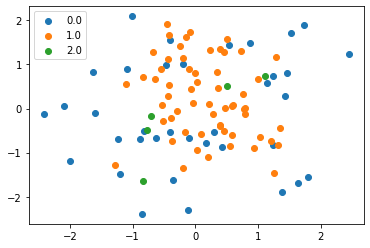

In [83]:
import numpy as np
import math
import random
import matplotlib.pyplot as plt


pointcloudsdummy = np.random.randn(800).reshape((100,8))

def distance2pts(vector1, vector2, p=2):
    #Euclidian p = 2
    #Manhatten p = 1
    num = 0
    for i in range(0,len(vector1)):
        num += abs(vector1[i]-vector2[i]) ** p
    return num ** (1/p)

def check_if_core_point(data, features, eps, minPts, ptIndex):

    temp = np.empty(1)

    for i, item in enumerate(data[:,features]):
        if distance2pts(item, data[ptIndex,features]) <= eps and i != ptIndex:
            temp = np.append(temp, i)
    
    temp = np.delete(temp, 0) # this deletes the first item that is erroneously created when making an 'empty' array

    if len(temp) >= minPts:
        # it's a core points
        return temp, 1
    elif (len(temp) < minPts) and len(temp) > 0:
        # it's a border point
        return temp, -1
    elif len(temp) == 0:
        # it's a noise point
        return temp, -2
    else:
        print("Failed to categorise point")
    
    """ 1 = core, -1 = border, -2 = noise"""


#print(check_if_core_point(pointcloudsdummy, 0, 1, 10, 8, 7))


# loop to go through each point on the lists

def dbscan(data, features, eps, minPts):

    dataConsidered = data[:,features]
    # start cluster C number
    C = 1
    # initialising stacks to maintain
    current_Stack = set()
    unvisited = list(range(0,len(data)))
    clusters = np.zeros(len(data))
    x = 1

    while (len(unvisited) != 0): #this will run until all points  have been assessed

        first_point = True

        random.seed(x)
        current_Stack.add(random.choice(unvisited))
        random.shuffle(unvisited)

        #current_Stack.add(unvisited[x % len(unvisited)])
        x += 1

        while len(current_Stack) != 0: #run until this cluster is  done
            
            #remove current point from stack to keep clean
            curr_index = int(current_Stack.pop())

            #check if core, border or noise
            """ 1 = core, -1 = border, -2 = noise"""
            neighbour_points, point_status = check_if_core_point(data, features, eps, minPts, curr_index)

            #consider only neighbour points not visited already
            neighbour_points = set(neighbour_points) & set(unvisited)

       
            if ((point_status == -1) and first_point and x < 2 * len(unvisited)):
                break
            elif ((point_status == -1) and first_point and x == 2 * len(unvisited)):
                clusters[curr_index] = 0
                unvisited.remove(curr_index)
                for i in  neighbour_points:
                    # print("in loop, this is i: ", i)
                    clusters[int(i)] = 0
                    unvisited.remove(i)
                continue
            x = 1
                        
            unvisited.remove(curr_index) # remove from unvisited list


            if point_status == 1: #is a core point
                first_point = False
                clusters[curr_index] = C #assign cluster number
                current_Stack.update(neighbour_points)
            
            elif point_status == -1: #is border
                clusters[curr_index] = C #assign to cluster
                continue

            elif point_status == -2: #is noise
                clusters[curr_index] = 0
                continue

        if not first_point:
            #increment to next cluster
            C += 1
    
    return clusters, dataConsidered


def plot_dbscan(clustergroup_new, dataConsidered):
    #Getting the Centroids
    u_labels = np.unique(clustergroup_new)

    # #plotting the results:
    for p in u_labels:
        plt.scatter(dataConsidered[clustergroup_new == p , 0] , dataConsidered[clustergroup_new == p , 1] , label = p)
    #plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = "black") # only for centroids
    plt.legend()
    plt.show()



clusters, dataConsidered = dbscan(pointcloudsdummy, [0,1,3,4,5], 1.3, 3)


plot_dbscan(clusters, dataConsidered)

# print(clusters)
# print(dataConsidered)
    


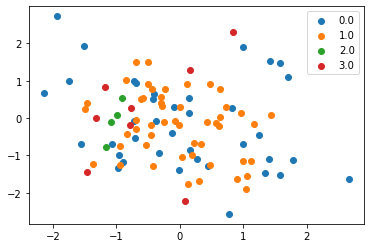

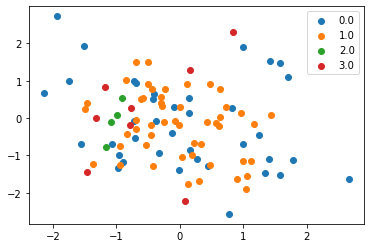

In [81]:
#Plot graphs
def plot_dbscan(clustergroup_new, dataConsidered):
    #Getting the Centroids
    u_labels = np.unique(clustergroup_new)

    # #plotting the results:
    for p in u_labels:
        plt.scatter(dataConsidered[clustergroup_new == p , 0] , dataConsidered[clustergroup_new == p , 1] , label = p)
    #plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = "black") # only for centroids
    plt.legend()
    plt.show()

plot_dbscan(clusters, dataConsidered)